In [93]:
#Loading the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


The NYC Benchmarking Law requires owners of large buildings to annually measure their energy and water
consumption in a process called benchmarking. The law standardizes this process by requiring building owners
to enter their annual energy and water use in the U.S. Environmental Protection Agency's (EPA) online
tool, Energy Star Portfolio Manager and use the tool to submit data. This data informs building owners about
a building's energy and water consumption compared to similar buildings, and tracks progress year over year
to help in energy efficiency planning
An energy efficiency score is the Energy Star Rating that a building earns using the United States
Environmental Protection Agency online benchmarking tool, Energy Star Portfolio Manager, to compare
building energy performance to similar buildings in similar climates.

A Score > 85
B 70 < Score < 85
C 55 < Score < 70
D Score < 50
F Failed to submit
N Not covered

Data Science Problem:
Build the right model to predict the “Energy Star score” of a building ‘s using the provided data


In [94]:
energy_df = pd.read_csv('Usecase1_Dataset.csv')
energy_df.head()

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2  ...  \
0  201/205  East  42nd  st.            Not Available  ...   
1          622 168th Street            Not Available  ...   
2             3975 Broadway            Not Available  ...   
3   161 Fort Washington Ave  177 Fort Washington Ave  ...   
4     710 West 168th Street            Not Available  ...   

  Source EUI (kBtu/ft²)            Release Date Water Required?  \
0                 619.4  05/01/2017 05:32:03 PM              No   
1                 404.3  04/27/2017 11:23:27 AM              No   
2         Not Available  04/27/2017 11:23:27 AM              No   
3         Not Available  04/27/2017 11:23:27 AM              No   
4         Not Available  04/27/2017 11:23:27 AM              No   

  DOF Benchmarking Submission Status   Latitude  Longitude Community Board  \
0                      In Compliance  40.750791 -73.973963             6.0   
1                      In Compliance  40.841402 -73.942568            12.0   
2                      In Compliance  40.840427 -73.940249            12.0   
3                      In Compliance  40.840746 -73.942854            12.0   
4                      In Compliance  40.841559 -73.942528            12.0   

  Council District Census Tract  \
0              4.0         88.0   
1             10.0        251.0   
2             10.0        251.0   
3             10.0        255.0   
4             10.0        255.0   

                                                 NTA  
0  Turtle Bay-East Midtown                       ...  
1  Washington Heights South                      ...  
2  Washington Heights South                      ...  
3  Washington Heights South                      ...  
4  Washington Heights South                      ...  

[5 rows x 60 columns]

In [95]:
#check for null values
energy_df.isnull().sum()

Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                 11
NYC Borough, Block and Lot (BBL) self-reported                   0
NYC Building Identification Number (BIN)                         0
Address 1 (self-reported)                                        0
Address 2                                                        0
Postal Code                                                      0
Street Number                                                  124
Street Name                                                    122
Borough                                                        118
DOF Gross Floor Area                                          

In [96]:
#to obtain the shape of the dataset
energy_df.shape

(11746, 60)

In [97]:
#to check for duplicate records
energy_df.duplicated().sum()

0

In [98]:
#no duplicate records exist as shown above
#to obtain information on the data
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [99]:
#fix the missing/null value issue

#categorical variable transformation

#check correlation

#proceed with model-building

#use metrics to evaluate the model

In [100]:
import warnings
warnings.filterwarnings("ignore")

import pandas_profiling as pf
pf.ProfileReport(energy_df)

In [101]:
#we notice that there are a lot of variables with 'Not Available', let us convert them to 'Nan' for further processing

energy_df.replace('Not Available', np.nan, inplace=True)

In [102]:
energy_df.isnull().sum()   #to identify the actual missing values in the given dataset

Order                                                             0
Property_Id                                                       0
Property_Name                                                     0
Parent_Property_Id                                                0
Parent_Property_Name                                              0
BBL_-_10_digits                                                  11
NYC_Borough,_Block_and_Lot_(BBL)_self-reported                   11
NYC_Building_Identification_Number_(BIN)                        162
Address_1_(self-reported)                                         0
Address_2                                                     11539
Postal_Code                                                       0
Street_Number                                                   124
Street_Name                                                     122
Borough                                                         118
DOF_Gross_Floor_Area                            

In [103]:
#let us obtain the data description of the given dataset
energy_df.describe()

Order   Property_Id  DOF_Gross_Floor_Area    Year_Built  \
count  11746.000000  1.174600e+04          1.162800e+04  11746.000000   
mean    7185.759578  3.642958e+06          1.732695e+05   1948.738379   
std     4323.859984  1.049070e+06          3.367055e+05     30.576386   
min        1.000000  7.365000e+03          5.002800e+04   1600.000000   
25%     3428.250000  2.747222e+06          6.524000e+04   1927.000000   
50%     6986.500000  3.236404e+06          9.313850e+04   1941.000000   
75%    11054.500000  4.409092e+06          1.596140e+05   1966.000000   
max    14993.000000  5.991312e+06          1.354011e+07   2019.000000   

       Number_of_Buildings_-_Self-reported     Occupancy  \
count                         11746.000000  11746.000000   
mean                              1.289971     98.762557   
std                               4.017484      7.501603   
min                               0.000000      0.000000   
25%                               1.000000    100.000000   
50%                               1.000000    100.000000   
75%                               1.000000    100.000000   
max                             161.000000    100.000000   

       Property_GFA_-_Self-Reported_(ft²)     Latitude    Longitude  \
count                        1.174600e+04  9483.000000  9483.000000   
mean                         1.673739e+05    40.754379   -73.957057   
std                          3.189238e+05     0.080120     0.046337   
min                          0.000000e+00    40.516065   -74.243582   
25%                          6.699400e+04    40.707226   -73.984662   
50%                          9.408000e+04    40.759130   -73.962810   
75%                          1.584140e+05    40.817623   -73.932443   
max                          1.421712e+07    40.912869   -73.715543   

       Community_Board  Council_District   Census_Tract  
count      9483.000000       9483.000000    9483.000000  
mean          7.140673         15.771275    4977.596647  
std           3.954129         15.674375   13520.422990  
min           1.000000          1.000000       1.000000  
25%           4.000000          4.000000     100.000000  
50%           7.000000          9.000000     201.000000  
75%           9.000000         33.000000     531.500000  
max          56.000000         51.000000  155101.000000

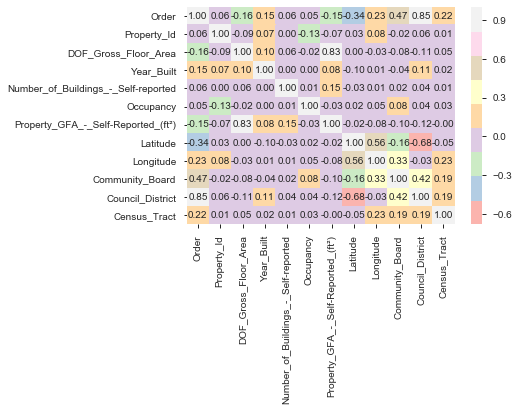

In [104]:
sns.heatmap(energy_df.corr(), annot= True, fmt='.2f', cmap='Pastel1')
plt.show()

In [105]:
# trying to drop those features that have no impact on the energy star rating like order, name of property or address/location

energy_df.drop(['BBL_-_10_digits', 'NYC_Borough,_Block_and_Lot_(BBL)_self-reported', 
                'NYC_Building_Identification_Number_(BIN)', 'Address_1_(self-reported)', 
                'Address_2', 'Postal_Code', 'Parent_Property_Name',
                'Street_Number','Street_Name'], axis=1, inplace=True)

In [106]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 51 columns):
Order                                                         11746 non-null int64
Property_Id                                                   11746 non-null int64
Property_Name                                                 11746 non-null object
Parent_Property_Id                                            11746 non-null object
Borough                                                       11628 non-null object
DOF_Gross_Floor_Area                                          11628 non-null float64
Primary_Property_Type_-_Self_Selected                         11746 non-null object
List_of_All_Property_Use_Types_at_Property                    11746 non-null object
Largest_Property_Use_Type                                     11744 non-null object
Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)            11744 non-null object
2nd_Largest_Property_Use_Type                       

In [107]:
#we will drop the variables with very high number of missing values - approx 70% or more of missing data per column
#also, the energy star rating depends mostly on the energy consumption and the not the secondary type of use of the building,
#and the various fuel oil type use have more than 9000 or 10000 missing values, hence proceeding to drop those variables.
energy_df.drop(['2nd_Largest_Property_Use_Type', '2nd_Largest_Property_Use_-_Gross_Floor_Area_(ft²)','3rd_Largest_Property_Use_Type',
                '3rd_Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)','Fuel_Oil_#1_Use_(kBtu)','Fuel_Oil_#2_Use_(kBtu)',
                'Fuel_Oil_#4_Use_(kBtu)','Fuel_Oil_#5_&_6_Use_(kBtu)','Diesel_#2_Use_(kBtu)','District_Steam_Use_(kBtu)'], axis=1, inplace=True)

In [108]:
energy_df.drop(['Order', 'Property_Id', 'Property_Name', 'Parent_Property_Id', 'Borough'], axis=1, inplace=True)
#we are trying to drop the Id or Name of the properties as they have no bearing on the energy star ratings of the buildings.
#Borough is also not relavant as it is an administrative demarcation of the region - hence we will drop it too.

In [109]:
energy_df.isnull().sum()

DOF_Gross_Floor_Area                                           118
Primary_Property_Type_-_Self_Selected                            0
List_of_All_Property_Use_Types_at_Property                       0
Largest_Property_Use_Type                                        2
Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)               2
Year_Built                                                       0
Number_of_Buildings_-_Self-reported                              0
Occupancy                                                        0
Metered_Areas_(Energy)                                          57
Metered_Areas__(Water)                                        4609
ENERGY_STAR_Score                                             2104
Site_EUI_(kBtu/ft²)                                            163
Weather_Normalized_Site_EUI_(kBtu/ft²)                        1465
Weather_Normalized_Site_Electricity_Intensity_(kWh/ft²)        787
Weather_Normalized_Site_Natural_Gas_Intensity_(therms/ft²)    

In [110]:
energy_df['Metered_Areas__(Water)'].value_counts()

Whole Building                            7111
Combination of common and tenant areas      10
Common areas only                            7
Another configuration                        6
Tenant areas only                            2
Tenant areas (all energy loads)              1
Name: Metered_Areas__(Water), dtype: int64

In [111]:
energy_df['Metered_Areas_(Energy)'].value_counts()

Whole Building                                                                                          11648
Another configuration                                                                                      31
Common areas only                                                                                           6
Tenant Cooling, Common Area Hot Water, Common Area Heating, Common Area Plug Load/Electricity               1
Tenant Plug Load/Electricity, Common Area Cooling, Tenant Cooling, Common Area Plug Load/Electricity        1
Common Area Cooling, Tenant Plug Load/Electricity, Tenant Cooling, Common Area Plug Load/Electricity        1
Tenant areas only                                                                                           1
Name: Metered_Areas_(Energy), dtype: int64

In [112]:
energy_df.drop(['Latitude','Longitude', 'NTA'], axis=1, inplace=True)  
#dropping latitude and longitude and NTA as the location and agency do not impact the energy star rating

In [113]:
energy_df.shape   #to check the number of remaining columns/variables -- there are 33 variables now

(11746, 33)

In [114]:
energy_df.describe()

DOF_Gross_Floor_Area    Year_Built  \
count          1.162800e+04  11746.000000   
mean           1.732695e+05   1948.738379   
std            3.367055e+05     30.576386   
min            5.002800e+04   1600.000000   
25%            6.524000e+04   1927.000000   
50%            9.313850e+04   1941.000000   
75%            1.596140e+05   1966.000000   
max            1.354011e+07   2019.000000   

       Number_of_Buildings_-_Self-reported     Occupancy  \
count                         11746.000000  11746.000000   
mean                              1.289971     98.762557   
std                               4.017484      7.501603   
min                               0.000000      0.000000   
25%                               1.000000    100.000000   
50%                               1.000000    100.000000   
75%                               1.000000    100.000000   
max                             161.000000    100.000000   

       Property_GFA_-_Self-Reported_(ft²)  Community_Board  Council_District  \
count                        1.174600e+04      9483.000000       9483.000000   
mean                         1.673739e+05         7.140673         15.771275   
std                          3.189238e+05         3.954129         15.674375   
min                          0.000000e+00         1.000000          1.000000   
25%                          6.699400e+04         4.000000          4.000000   
50%                          9.408000e+04         7.000000          9.000000   
75%                          1.584140e+05         9.000000         33.000000   
max                          1.421712e+07        56.000000         51.000000   

        Census_Tract  
count    9483.000000  
mean     4977.596647  
std     13520.422990  
min         1.000000  
25%       100.000000  
50%       201.000000  
75%       531.500000  
max    155101.000000

In [115]:
energy_df.isnull().sum()

DOF_Gross_Floor_Area                                           118
Primary_Property_Type_-_Self_Selected                            0
List_of_All_Property_Use_Types_at_Property                       0
Largest_Property_Use_Type                                        2
Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)               2
Year_Built                                                       0
Number_of_Buildings_-_Self-reported                              0
Occupancy                                                        0
Metered_Areas_(Energy)                                          57
Metered_Areas__(Water)                                        4609
ENERGY_STAR_Score                                             2104
Site_EUI_(kBtu/ft²)                                            163
Weather_Normalized_Site_EUI_(kBtu/ft²)                        1465
Weather_Normalized_Site_Electricity_Intensity_(kWh/ft²)        787
Weather_Normalized_Site_Natural_Gas_Intensity_(therms/ft²)    

In [116]:
energy_df['Water_Required?'].value_counts()

Yes    7552
No     4076
Name: Water_Required?, dtype: int64

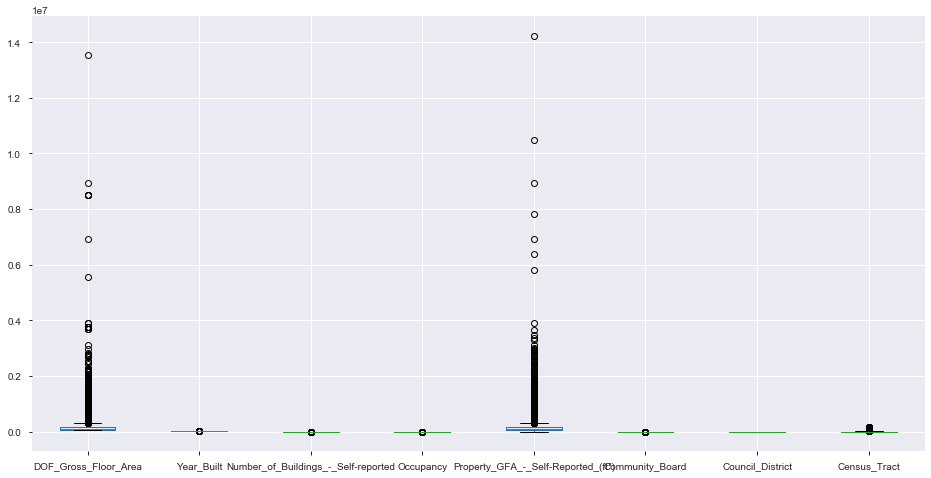

In [117]:
energy_df.boxplot(figsize=(16,8))  #trying to plot the raw data before any transformations.
plt.show()

# as we can see below, except for 'Council District' the remaining variables have outliers. 
# We also see that there is a need for standardizing the data to avoid the magnitude of some variables influence the predictions

In [118]:
#treating the outliers
for col in energy_df[['DOF_Gross_Floor_Area','Property_GFA_-_Self-Reported_(ft²)', 'Community_Board', 'Census_Tract']]:
    print(col)
    ll = energy_df[col].quantile(0.25)-(1.5*(energy_df[col].quantile(0.75) - energy_df[col].quantile(0.25)))
    ul = energy_df[col].quantile(0.75)+(1.5*(energy_df[col].quantile(0.75) - energy_df[col].quantile(0.25)))
    print('lower-limit : ', ll)
    print('upper-limit :', ul)
    energy_df[col] = np.where(energy_df[col] <ll, ll,energy_df[col])
    energy_df[col] = np.where(energy_df[col] >ul, ul,energy_df[col])
    print('removed outliers in', col)
    
#we are not treating the outliers in Year_Built, Number_of_Buildings_-_Self-reported and Occupancy as it is resulting in the loss of all valuable information and variance.

DOF_Gross_Floor_Area
lower-limit :  -76321.0
upper-limit : 301175.0
removed outliers in DOF_Gross_Floor_Area
Property_GFA_-_Self-Reported_(ft²)
lower-limit :  -70136.0
upper-limit : 295544.0
removed outliers in Property_GFA_-_Self-Reported_(ft²)
Community_Board
lower-limit :  -3.5
upper-limit : 16.5
removed outliers in Community_Board
Census_Tract
lower-limit :  -547.25
upper-limit : 1178.75
removed outliers in Census_Tract


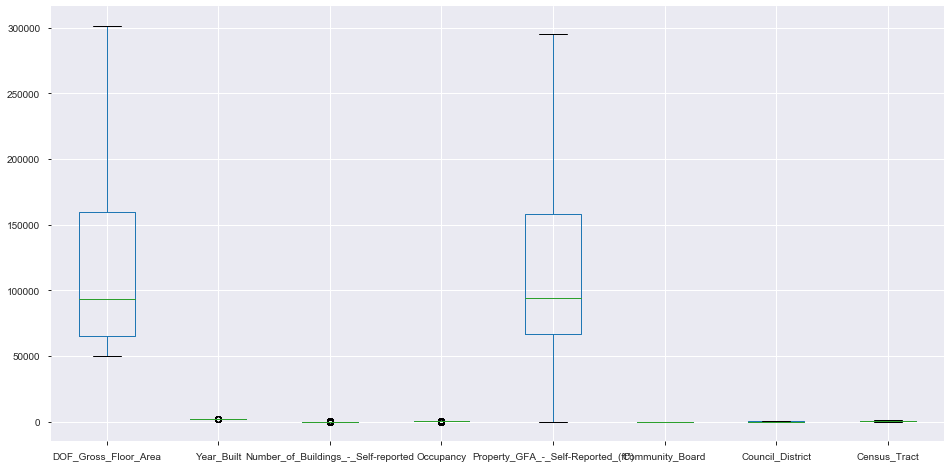

In [121]:
energy_df.boxplot(figsize=(16,8))
plt.show()

In [123]:
#to avoid any data-leakages, let us first split the data into train- and test-sets before further data-preprocessing

X = energy_df.drop('ENERGY_STAR_Score', axis=1)
y = energy_df.pop('ENERGY_STAR_Score')   #taking the energy star score as the dependent variable.

from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [124]:
X_train.tail()

DOF_Gross_Floor_Area Primary_Property_Type_-_Self_Selected  \
7813               117366.0                   Multifamily Housing   
10955               85336.0                   Multifamily Housing   
905                 67452.0                                 Hotel   
5192                51479.0                   Multifamily Housing   
235                236984.0                   Multifamily Housing   

              List_of_All_Property_Use_Types_at_Property  \
7813                                 Multifamily Housing   
10955               Multifamily Housing, Office, Parking   
905              Hotel, Office, Restaurant, Retail Store   
5192   Convenience Store without Gas Station, Multifa...   
235                         Multifamily Housing, Parking   

      Largest_Property_Use_Type  \
7813        Multifamily Housing   
10955       Multifamily Housing   
905                       Hotel   
5192        Multifamily Housing   
235         Multifamily Housing   

      Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)  Year_Built  \
7813                                              117366        1937   
10955                                              69618        1956   
905                                                58538        1890   
5192                                               43617        1935   
235                                               291876        1966   

       Number_of_Buildings_-_Self-reported  Occupancy Metered_Areas_(Energy)  \
7813                                     1        100         Whole Building   
10955                                    1        100         Whole Building   
905                                      1        100         Whole Building   
5192                                     1        100         Whole Building   
235                                      2        100         Whole Building   

      Metered_Areas__(Water)  ... Property_GFA_-_Self-Reported_(ft²)  \
7813          Whole Building  ...                           117366.0   
10955         Whole Building  ...                            70818.0   
905           Whole Building  ...                            76000.0   
5192                     NaN  ...                            51479.0   
235           Whole Building  ...                           291876.0   

      Water_Use_(All_Water_Sources)_(kgal)  \
7813                                 424.7   
10955                                    0   
905                                21995.7   
5192                                   NaN   
235                                    NaN   

      Water_Intensity_(All_Water_Sources)_(gal/ft²) Source_EUI_(kBtu/ft²)  \
7813                                           3.62                 101.8   
10955                                             0                 155.5   
905                                          289.42                 422.8   
5192                                            NaN                 149.3   
235                                             NaN                 129.7   

                 Release_Date Water_Required?  \
7813   04/26/2017 01:22:14 PM              No   
10955  04/14/2017 11:45:05 AM             Yes   
905    04/20/2017 05:51:20 PM             Yes   
5192   04/26/2017 01:46:16 PM             Yes   
235    05/01/2017 09:17:10 PM             NaN   

      DOF_Benchmarking_Submission_Status Community_Board Council_District  \
7813                       In Compliance             9.0             35.0   
10955                      In Compliance             NaN              NaN   
905                        In Compliance             2.0              1.0   
5192                       In Compliance            12.0             10.0   
235                        In Compliance             NaN              NaN   

      Census_Tract  
7813         355.0  
10955          NaN  
905           49.0  
5192         269.0  
235            NaN  

[5 rows x 32 columns]

In [125]:
y_test.head()

1177     NaN
1912      74
7767      87
10130     41
674       63
Name: ENERGY_STAR_Score, dtype: object

In [126]:
#treating the null values
#impute the missing categorical variables with mode/most frequent occurance

for col in X_train.columns:
    if X_train[col].dtype=='object':
        X_train[col] = X_train[col].fillna(X_train[col].mode()[0])  #we use mode()[0], in case if there are more than one modes.

In [127]:
for col in X_test.columns:
    if X_test[col].dtype=='object':
        X_test[col] = X_test[col].fillna(X_test[col].mode()[0])  #we use mode()[0], in case if there are more than one modes

In [128]:
y_test = y_test.fillna(y_test.mode()[0])
y_train = y_train.fillna(y_train.mode()[0])

In [129]:
y_train.isnull().sum()

0

In [130]:
X_train.isnull().sum()

DOF_Gross_Floor_Area                                            77
Primary_Property_Type_-_Self_Selected                            0
List_of_All_Property_Use_Types_at_Property                       0
Largest_Property_Use_Type                                        0
Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)               0
Year_Built                                                       0
Number_of_Buildings_-_Self-reported                              0
Occupancy                                                        0
Metered_Areas_(Energy)                                           0
Metered_Areas__(Water)                                           0
Site_EUI_(kBtu/ft²)                                              0
Weather_Normalized_Site_EUI_(kBtu/ft²)                           0
Weather_Normalized_Site_Electricity_Intensity_(kWh/ft²)          0
Weather_Normalized_Site_Natural_Gas_Intensity_(therms/ft²)       0
Weather_Normalized_Source_EUI_(kBtu/ft²)                      

In [131]:
X_train.describe()

DOF_Gross_Floor_Area   Year_Built  Number_of_Buildings_-_Self-reported  \
count           8145.000000  8222.000000                          8222.000000   
mean          126732.207489  1948.926052                             1.318779   
std            81067.436388    30.496933                             4.429659   
min            50028.000000  1649.000000                             0.000000   
25%            65028.000000  1927.000000                             1.000000   
50%            92956.000000  1941.000000                             1.000000   
75%           158994.000000  1966.000000                             1.000000   
max           301175.000000  2019.000000                           161.000000   

         Occupancy  Property_GFA_-_Self-Reported_(ft²)  Community_Board  \
count  8222.000000                         8222.000000      6648.000000   
mean     98.777062                       125551.440161         7.082055   
std       7.589456                        78504.110344         3.856634   
min       0.000000                            0.000000         1.000000   
25%     100.000000                        66960.000000         4.000000   
50%     100.000000                        93802.000000         7.000000   
75%     100.000000                       157054.750000         9.000000   
max     100.000000                       295544.000000        16.500000   

       Council_District  Census_Tract  
count       6648.000000   6648.000000  
mean          15.835289    393.160387  
std           15.657894    406.508530  
min            1.000000      1.000000  
25%            4.000000    100.000000  
50%            9.000000    203.000000  
75%           33.000000    519.000000  
max           51.000000   1178.750000

In [132]:
#to get a list of variables with numeric datatype and impute them with median in the train- and test-sets
#as there are some extremely high values for some variables, though we treated the outliers, opting to impute with median and not mean in this case
for col in X_train.columns:
    if X_train[col].dtype !='object':
        X_train[col] = X_train[col].fillna(X_train[col].median())
        
for col in X_test.columns:
    if X_test[col].dtype !='object':
        X_test[col] = X_test[col].fillna(X_test[col].median())

In [133]:
#we have treated the null values in the dataset
X_train.isnull().sum()

DOF_Gross_Floor_Area                                          0
Primary_Property_Type_-_Self_Selected                         0
List_of_All_Property_Use_Types_at_Property                    0
Largest_Property_Use_Type                                     0
Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)            0
Year_Built                                                    0
Number_of_Buildings_-_Self-reported                           0
Occupancy                                                     0
Metered_Areas_(Energy)                                        0
Metered_Areas__(Water)                                        0
Site_EUI_(kBtu/ft²)                                           0
Weather_Normalized_Site_EUI_(kBtu/ft²)                        0
Weather_Normalized_Site_Electricity_Intensity_(kWh/ft²)       0
Weather_Normalized_Site_Natural_Gas_Intensity_(therms/ft²)    0
Weather_Normalized_Source_EUI_(kBtu/ft²)                      0
Natural_Gas_Use_(kBtu)                  

In [134]:
X_test.isnull().sum()

DOF_Gross_Floor_Area                                          0
Primary_Property_Type_-_Self_Selected                         0
List_of_All_Property_Use_Types_at_Property                    0
Largest_Property_Use_Type                                     0
Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)            0
Year_Built                                                    0
Number_of_Buildings_-_Self-reported                           0
Occupancy                                                     0
Metered_Areas_(Energy)                                        0
Metered_Areas__(Water)                                        0
Site_EUI_(kBtu/ft²)                                           0
Weather_Normalized_Site_EUI_(kBtu/ft²)                        0
Weather_Normalized_Site_Electricity_Intensity_(kWh/ft²)       0
Weather_Normalized_Site_Natural_Gas_Intensity_(therms/ft²)    0
Weather_Normalized_Source_EUI_(kBtu/ft²)                      0
Natural_Gas_Use_(kBtu)                  

In [135]:
y_test.isnull().sum()

0

In [136]:
#proceeding to perform label encoding to convert the variables in object datatype to numeric
#X_train
for col in X_train.columns:
    if X_train[col].dtype =='object':
        X_train[col] = pd.Categorical(X_train[col]).codes
        

In [137]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8222 entries, 10679 to 235
Data columns (total 32 columns):
DOF_Gross_Floor_Area                                          8222 non-null float64
Primary_Property_Type_-_Self_Selected                         8222 non-null int8
List_of_All_Property_Use_Types_at_Property                    8222 non-null int16
Largest_Property_Use_Type                                     8222 non-null int8
Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)            8222 non-null int16
Year_Built                                                    8222 non-null int64
Number_of_Buildings_-_Self-reported                           8222 non-null int64
Occupancy                                                     8222 non-null int64
Metered_Areas_(Energy)                                        8222 non-null int8
Metered_Areas__(Water)                                        8222 non-null int8
Site_EUI_(kBtu/ft²)                                           8222 non-n

In [138]:
#proceeding to perform label encoding to convert the variables in object datatype to numeric
#X_test
for col in X_test.columns:
    if X_test[col].dtype =='object':
        X_test[col] = pd.Categorical(X_test[col]).codes   

In [139]:
y_train = pd.to_numeric(y_train)
y_test = pd.to_numeric(y_test)

In [140]:
y_train.head()

10679    50
9390     94
3178      5
3435     58
6895     35
Name: ENERGY_STAR_Score, dtype: int64

In [141]:
X_train['DOF_Benchmarking_Submission_Status'].value_counts()

0    8222
Name: DOF_Benchmarking_Submission_Status, dtype: int64

In [142]:
energy_df['DOF_Benchmarking_Submission_Status'].value_counts()

In Compliance    11716
Name: DOF_Benchmarking_Submission_Status, dtype: int64

In [143]:
X_train.drop('DOF_Benchmarking_Submission_Status', axis=1, inplace=True)
X_test.drop('DOF_Benchmarking_Submission_Status', axis=1, inplace=True)
#we dropped 'DOF_Benchmarking_Submission_Status' as there is no variance in the data for this variable.

In [144]:
energy_df['Occupancy'].value_counts()

100    10885
95       391
90       206
80        66
85        49
0         34
75        31
70        21
50        13
40        12
60        10
65         7
30         5
25         5
5          4
10         4
45         1
55         1
20         1
Name: Occupancy, dtype: int64

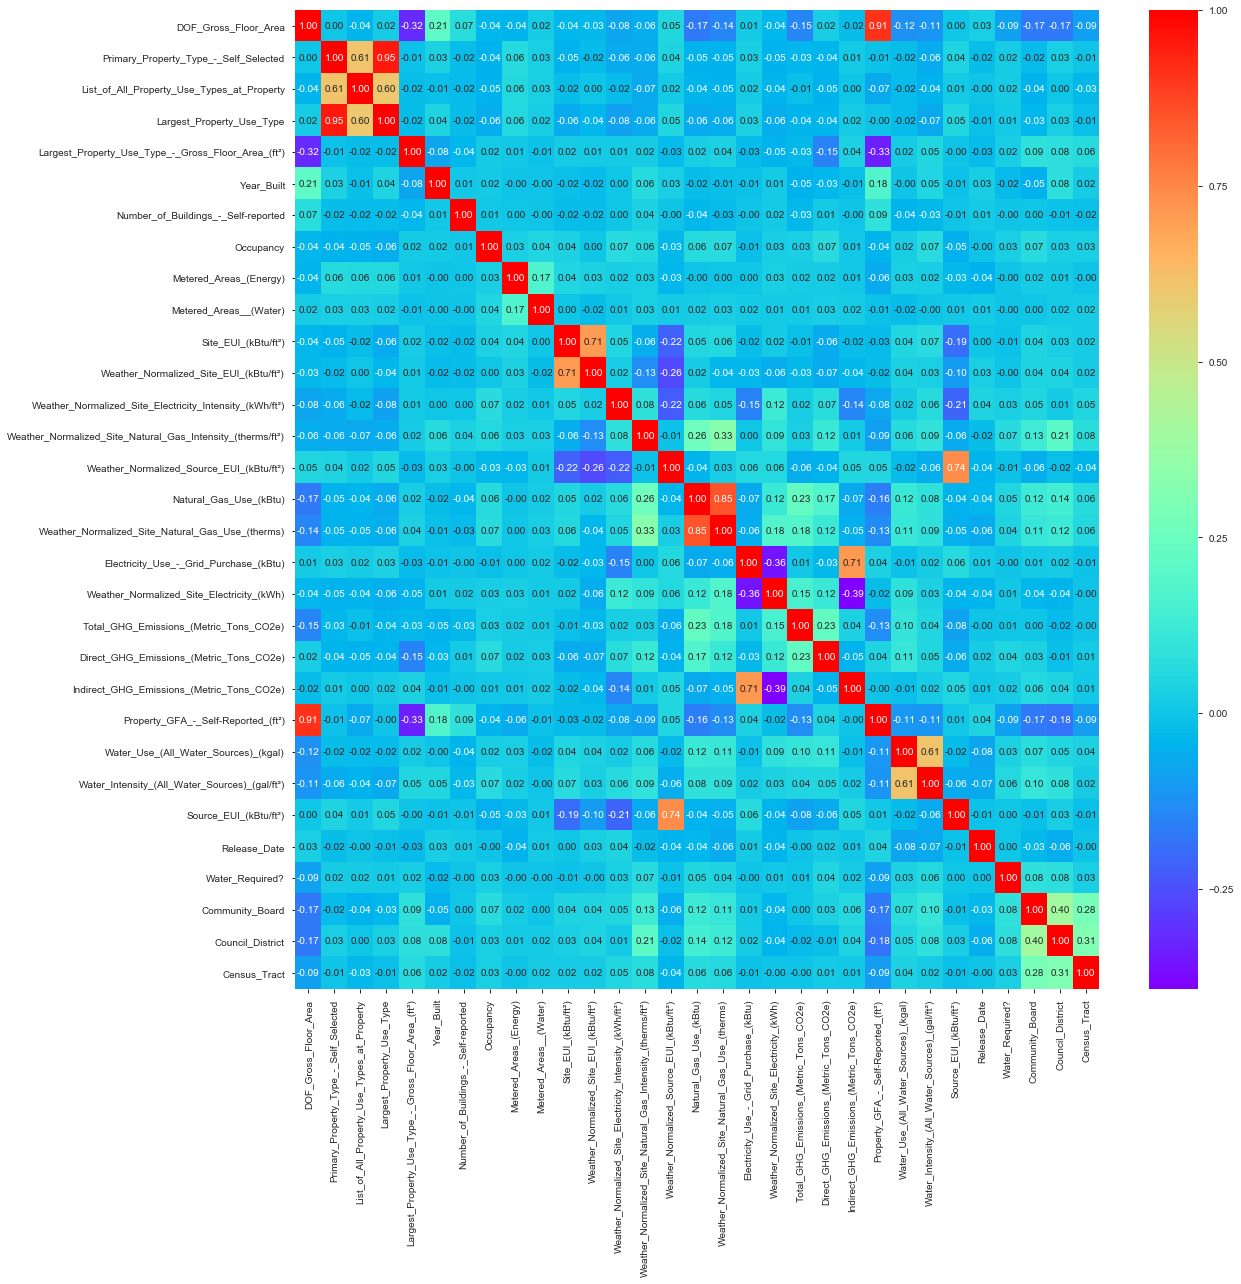

In [148]:
#Exploratory Data Analysis
#Correlation between the independent variables
plt.figure(figsize=(18,18))
sns.heatmap(X_train.corr(), cmap='rainbow', annot=True, fmt='.2f')
plt.show()

In [151]:
#drop highly collinear features
X_train.drop(['Weather_Normalized_Site_EUI_(kBtu/ft²)', 
                          'Property_GFA_-_Self-Reported_(ft²)',
                            'Weather_Normalized_Site_Natural_Gas_Use_(therms)',
                          'Primary_Property_Type_-_Self_Selected'], axis=1, inplace=True)

X_test.drop(['Weather_Normalized_Site_EUI_(kBtu/ft²)', 
                          'Property_GFA_-_Self-Reported_(ft²)',
                            'Weather_Normalized_Site_Natural_Gas_Use_(therms)',
                          'Primary_Property_Type_-_Self_Selected'], axis=1, inplace=True)

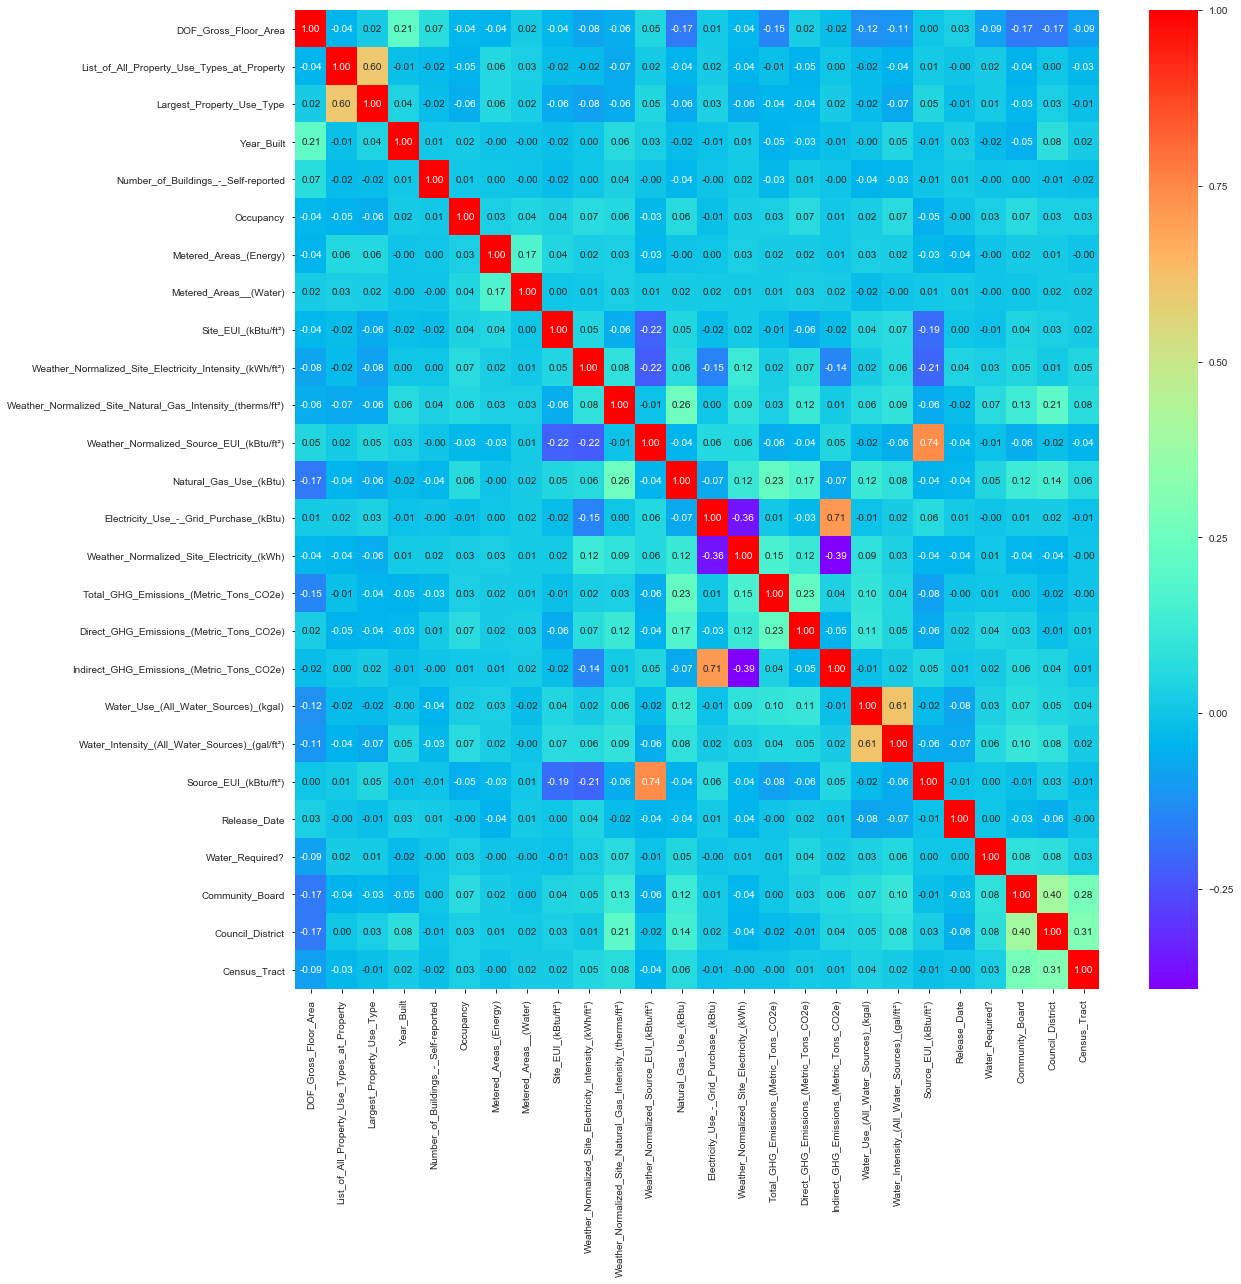

In [152]:
plt.figure(figsize=(18,18))
sns.heatmap(X_train.corr(), cmap='rainbow', annot=True, fmt='.2f')
plt.show()

In [153]:
#let us try to standardize the data as there is a lot of variation in the magnitude of data in various variables
from sklearn.preprocessing import StandardScaler    #importing library required to scale the data

sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)   #perform standard scaling on the encoded X_train obtained above.
scaled_X_train

array([[-0.83658128, -0.1913015 , -0.18526463, ..., -0.01913225,
        -0.38559465, -0.41212335],
       [-0.35191023, -0.1913015 , -0.18526463, ...,  1.99945114,
         2.12607832,  1.11836398],
       [ 1.77008601, -1.37189606, -1.69848531, ..., -0.59587036,
        -0.73443812,  2.20324094],
       ...,
       [-0.73022511, -1.23641799, -1.69848531, ..., -1.46097752,
        -0.9437442 , -0.82489927],
       [-0.92803916, -3.1718189 , -0.18526463, ...,  1.42271303,
        -0.31582596, -0.23521938],
       [ 1.36930606,  0.62156688, -0.18526463, ..., -0.01913225,
        -0.38559465, -0.41212335]])

In [154]:
#perform standard scaling on the encoded test-set obtained earlier.
scaled_X_test = sc.transform(X_test)  
scaled_X_test

array([[ 2.16426515, -1.00416988,  2.0845664 , ..., -0.88423941,
        -0.80420681, -0.69088111],
       [-0.07945615, -1.21706398, -0.18526463, ..., -0.59587036,
        -0.8739755 , -0.75789019],
       [-0.8994934 , -2.02993236, -0.75272238, ...,  0.55760587,
         1.77723485, -0.0743976 ],
       ...,
       [ 2.16426515, -1.64285218, -0.75272238, ...,  0.26923681,
        -0.73443812, -0.63995421],
       [-0.77581163, -2.02993236, -0.75272238, ..., -1.46097752,
         1.288854  , -0.89994943],
       [-0.60005398, -1.81703826, -0.75272238, ...,  1.99945114,
         1.77723485,  0.45363393]])

We have label-encoded the variables with 'object' datatype to convert them into numeric datatypes. Also, split the dataset into train- and test-sets in 70:30 ratio. We have performed the standard scaling on the dataset, as it is required to avoid the magnitude of some variables impacting the output of the model.

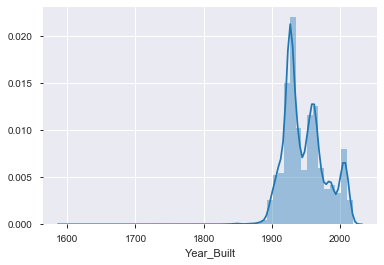

In [155]:
#avoided plotting pair-plot, considering the large number of variables.
sns.distplot(energy_df['Year_Built'])
plt.show()

In [156]:
energy_df.skew()

DOF_Gross_Floor_Area                                            1.154860
Largest_Property_Use_Type_-_Gross_Floor_Area_(ft²)             18.806924
Year_Built                                                      0.226411
Number_of_Buildings_-_Self-reported                            26.436335
Occupancy                                                     -10.009619
Site_EUI_(kBtu/ft²)                                            90.254339
Weather_Normalized_Site_EUI_(kBtu/ft²)                         87.051948
Weather_Normalized_Site_Electricity_Intensity_(kWh/ft²)        41.032173
Weather_Normalized_Site_Natural_Gas_Intensity_(therms/ft²)     92.735657
Weather_Normalized_Source_EUI_(kBtu/ft²)                       81.533225
Natural_Gas_Use_(kBtu)                                         99.343099
Weather_Normalized_Site_Natural_Gas_Use_(therms)               96.477511
Electricity_Use_-_Grid_Purchase_(kBtu)                         37.120637
Weather_Normalized_Site_Electricity_(kWh)          

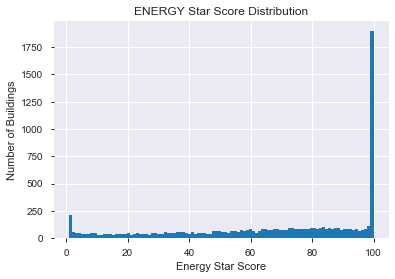

In [160]:
#The above skewness gives us information on the distribution of data for each of the features/variables.

# Histogram of the Energy Star Score
plt.hist(y_train, bins = 100)
plt.xlabel('Energy Star Score')
plt.ylabel('Number of Buildings')
plt.title('ENERGY Star Score Distribution')
plt.show()

In [162]:
# Mean Absolute Error - as our metric to evaluate the model as we are considering Regression
def mae(y_actual, y_predicted):
    return np.mean(abs(y_actual - y_predicted))

In [163]:
#proceeding with the ML modelling
#Linear Regression
from sklearn.linear_model import LinearRegression 

linReg = LinearRegression()
linReg.fit(scaled_X_train, y_train)
y_pred = linReg.predict(scaled_X_test)

In [164]:
linReg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
#to evaluate the Linear Regression Model
mae(y_test, y_pred)

24.099446792949898

In [185]:
energy_train = pd.concat([X_train, y_train], axis=1)
energy_train.head()

DOF_Gross_Floor_Area  List_of_All_Property_Use_Types_at_Property  \
10679               58864.0                                         385   
9390                98000.0                                         385   
3178               269346.0                                         263   
3435                68564.0                                         385   
6895                50250.0                                         385   

       Largest_Property_Use_Type  Year_Built  \
10679                         19        1932   
9390                          19        1930   
3178                          11        1990   
3435                          19        1928   
6895                          19        1922   

       Number_of_Buildings_-_Self-reported  Occupancy  Metered_Areas_(Energy)  \
10679                                    1        100                       4   
9390                                     1         80                       4   
3178                                     1        100                       4   
3435                                     1        100                       4   
6895                                     1        100                       4   

       Metered_Areas__(Water)  Site_EUI_(kBtu/ft²)  \
10679                       4                 1661   
9390                        4                 1229   
3178                        4                 1363   
3435                        4                 1613   
6895                        4                  177   

       Weather_Normalized_Site_Electricity_Intensity_(kWh/ft²)  ...  \
10679                                                280        ...   
9390                                                 130        ...   
3178                                                  80        ...   
3435                                                 348        ...   
6895                                                 228        ...   

       Indirect_GHG_Emissions_(Metric_Tons_CO2e)  \
10679                                       4166   
9390                                          47   
3178                                         519   
3435                                         689   
6895                                        3768   

       Water_Use_(All_Water_Sources)_(kgal)  \
10679                                  2893   
9390                                   4247   
3178                                    983   
3435                                   2275   
6895                                   1255   

       Water_Intensity_(All_Water_Sources)_(gal/ft²)  Source_EUI_(kBtu/ft²)  \
10679                                           3630                    289   
9390                                            3056                   2261   
3178                                            3617                    875   
3435                                            2485                    367   
6895                                            2279                    527   

       Release_Date  Water_Required?  Community_Board  Council_District  \
10679          1908                1              7.0               9.0   
9390            435                1             14.0              45.0   
3178           2278                1              5.0               4.0   
3435           1945                0              6.0               4.0   
6895           1451                1             10.0              13.0   

       Census_Tract  ENERGY_STAR_Score  
10679        203.00                 50  
9390         774.00                 94  
3178        1178.75                  5  
3435          90.00                 58  
6895         200.00                 35  

[5 rows x 27 columns]

In [186]:
#Lasso Regularization
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [187]:
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

In [188]:
mae(y_test, y_pred)

23.75024042863481

In [169]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

random_forest = RandomForestRegressor(random_state=1)
random_forest.fit(scaled_X_train, y_train)
y_pred = random_forest.predict(scaled_X_test)
random_forest_mae = mae(y_test, y_pred)

print('Random Forest Regression MAE on the test-set: MAE =', random_forest_mae)

Random Forest Regression MAE on the test-set: MAE = 29.55666572077184


In [192]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
y_pred = knn.predict(scaled_X_test)
knn_mae = mae(y_test, y_pred)

print('K-Nearest Neighbors Regression MAE on the test-set: MAE =', knn_mae)

K-Nearest Neighbors Regression MAE on the test-set: MAE = 22.111237230419995


In [195]:
knn1 = KNeighborsRegressor(n_neighbors=6)
knn1.fit(scaled_X_train, y_train)
y_pred = knn1.predict(scaled_X_test)
knn1_mae = mae(y_test, y_pred)

print('K-Nearest Neighbors Regression MAE with 6 n_neighbours MAE on the test-set: MAE =', knn1_mae)

K-Nearest Neighbors Regression MAE with 6 n_neighbours MAE on the test-set: MAE = 21.985291335603506


In [197]:
#XGBoost
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


gradient_boost = GradientBoostingRegressor(random_state=1)
gradient_boost.fit(scaled_X_train, y_train)
y_pred = gradient_boost.predict(scaled_X_test)
gradient_boost_mae= mae(y_test, y_pred)

print('Gradient Boosted Regression MAE on the test-set: MAE = ', gradient_boost_mae)

Gradient Boosted Regression MAE on the test-set: MAE =  27.176103532324856


In [189]:
#SVM
from sklearn.svm import SVR

svm = SVR(C = 1000, gamma = 0.1)
svm.fit(scaled_X_train, y_train)
y_pred = svm.predict(scaled_X_test)
svm_mae = mae(y_test, y_pred)

In [191]:
print('Support Vector Machine Regression MAE on the test-set: MAE =', svm_mae)

Support Vector Machine Regression MAE on the test-set: MAE = 26.219770922552794


From the above, we can notice that the best model for predicting the Energy-Star scores of the various buildings is K-Nearest Neighbours Regression Model with the least Mean Absolute Error (MAE) of 21.985, followed by Linear Regression with Lasso Regularization. The scores and models can be further improved using hyper-parameterization too.

K-Nearest Neighbour model can help us label the records for each cluster (here, category per each level of energy star rating).